## Assumptions

### Y must be of normalize data  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Dell\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Dell\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Dell\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Dell\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
from sklearn.datasets import load_boston
data = load_boston()

In [4]:
boston_df = pd.DataFrame(data = data.data , columns= data.feature_names)

In [5]:
boston_df["MEDV"] = data.target

In [6]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

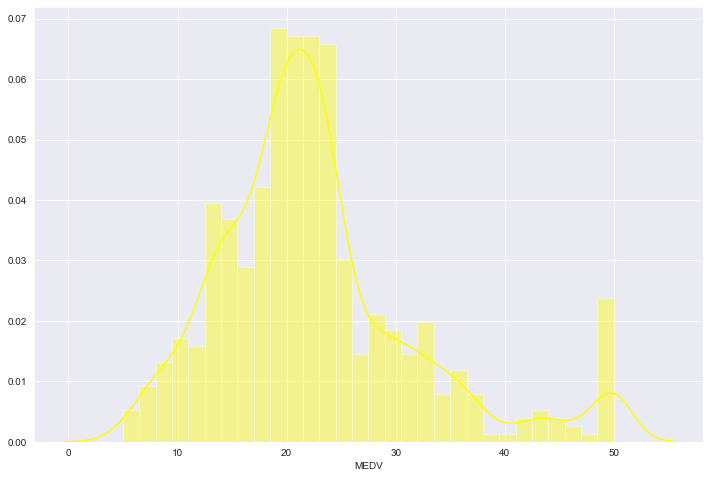

In [11]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.distplot(boston_df['MEDV'],bins = 30,color='yellow')
plt.show()

## FeatureSelction

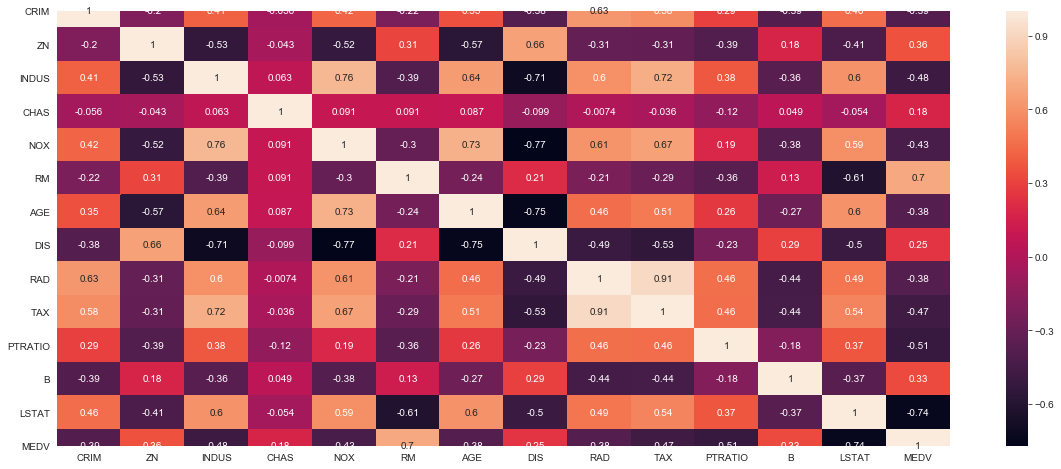

In [19]:
plt.figure(figsize=(20,8))
sns.heatmap(boston_df.corr(),annot=True)
plt.show()

In [21]:
boston_df.drop(['CHAS'],axis = 1,inplace = True)

In [22]:
boston_df.head(1)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


## Preprocessing

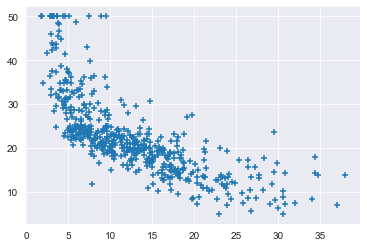

In [24]:
plt.scatter(x=boston_df['LSTAT'], y=boston_df['MEDV'],marker='+')
plt.show()

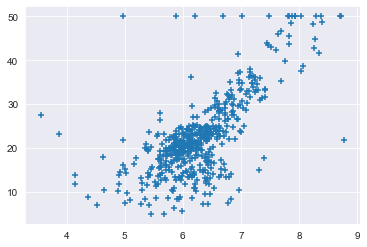

In [25]:
plt.scatter(x=boston_df['RM'], y=boston_df['MEDV'],marker='+')
plt.show()

## Data split into Train and Test

In [65]:
x = boston_df.drop(['MEDV'],axis=1)
y = boston_df['MEDV']
from sklearn.model_selection import train_test_split
train_x , test_x , train_y , test_y = train_test_split(x , y , test_size = 0.15,random_state = 2)

In [66]:
train_x.shape

(430, 12)

In [67]:
test_x.shape

(76, 12)

In [68]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
yhat = lr_model.predict(test_x)

In [70]:
lr_model.score(test_x,test_y)

0.7538850926505295

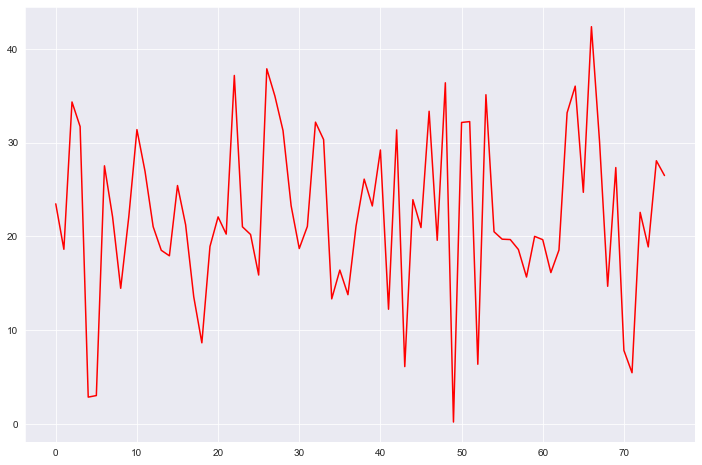

In [71]:
plt.figure(figsize=(12,8))
plt.plot(yhat,color = 'red')

In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(mean_squared_error(test_y,yhat))
print(r2_score(test_y,yhat))

18.869392609220412
0.7538850926505295
